# Inference using DCL


## Data loading


In [1]:
import numpy as np
import pandas as pd
from natsort import natsorted
from glob import glob

In [2]:
DATA_DIR = "data/"
SCAN_NAME = "phantom/"
data_files = natsorted(glob(f"{DATA_DIR}{SCAN_NAME}*.h5"))

In [3]:
data_files

['data/phantom/matched_df5_3007_with_ekf.h5']

In [4]:
df = pd.read_hdf(data_files[0])

In [5]:
df

,timestamp,OT_columns,IMU_columns,image_path,dt,EKF_predictions
0,1722338113379870000,"{'qw': 0.2792059779167175, 'qx': 0.11584350466...","{'CLA_X': -0.0123939029872417, 'CLA_Y': -0.028...",C:\Users\Robert Bing\Desktop\Matched_IMU_OT_fr...,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
1,1722338113479870000,"{'qw': 0.2792059779167175, 'qx': 0.11584350466...","{'CLA_X': -0.0123939029872417, 'CLA_Y': -0.028...",C:\Users\Robert Bing\Desktop\Matched_IMU_OT_fr...,0.1,"[-6.196951493620852e-05, -0.000143404901027679..."
2,1722338113579870000,"{'qw': 0.2792059779167175, 'qx': 0.11584350466...","{'CLA_X': -0.0123939029872417, 'CLA_Y': -0.028...",C:\Users\Robert Bing\Desktop\Matched_IMU_OT_fr...,0.1,"[-0.00024787805974483407, -0.00057361960411071..."
3,1722338113679870000,"{'qw': 0.2792059779167175, 'qx': 0.11584350466...","{'CLA_X': -0.0123939029872417, 'CLA_Y': -0.028...",C:\Users\Robert Bing\Desktop\Matched_IMU_OT_fr...,0.1,"[-0.0005577256344258767, -0.001290644109249111..."
4,1722338113779870000,"{'qw': 0.2792059779167175, 'qx': 0.11584350466...","{'CLA_X': -0.0123939029872417, 'CLA_Y': -0.028...",C:\Users\Robert Bing\Desktop\Matched_IMU_OT_fr...,0.1,"[-0.0009915122389793363, -0.002294478416442864..."
...,...,...,...,...,...,...
495,1722338162879870000,"{'qw': 0.4914664328098297, 'qx': 0.28868916630...","{'CLA_X': -0.1519252359867096, 'CLA_Y': 0.1668...",C:\Users\Robert Bing\Desktop\Matched_IMU_OT_fr...,0.1,"[-26.53943148598074, -35.51765119522798, 207.3..."
496,1722338162979870000,"{'qw': 0.4914664328098297, 'qx': 0.28868916630...","{'CLA_X': -0.1519252359867096, 'CLA_Y': 0.1668...",C:\Users\Robert Bing\Desktop\Matched_IMU_OT_fr...,0.1,"[-26.667360490187992, -35.59551184564816, 208...."
497,1722338163079870000,"{'qw': 0.4914664328098297, 'qx': 0.28868916630...","{'CLA_X': -0.1519252359867096, 'CLA_Y': 0.1668...",C:\Users\Robert Bing\Desktop\Matched_IMU_OT_fr...,0.1,"[-26.796808746755115, -35.67170401662575, 209...."
498,1722338163179870000,"{'qw': 0.4914664328098297, 'qx': 0.28868916630...","{'CLA_X': -0.1519252359867096, 'CLA_Y': 0.1668...",C:\Users\Robert Bing\Desktop\Matched_IMU_OT_fr...,0.1,"[-26.927776255682105, -35.746227708160745, 209..."


In [6]:
timestamps = df["timestamp"]
optical_tracker_data = df["OT_columns"]
imu_data = df["IMU_columns"]
image_paths = df["image_path"]
intervals = df["dt"]
ekf_smoothed_imu_data = df["EKF_predictions"]

In [7]:
optical_tracker_data.loc[0]

{'qw': 0.2792059779167175,
 'qx': 0.1158435046672821,
 'qy': -0.8547303080558777,
 'qz': 0.4219719767570495,
 'x': 121.20767211914062,
 'y': -15.18850326538086,
 'z': -911.9439697265624}

In [8]:
# unpack dictionaries in optical tracker data column's rows into separate columns
ot_columns = pd.DataFrame(
    optical_tracker_data.tolist(), index=optical_tracker_data.index
)
ot_columns

,qw,qx,qy,qz,x,y,z
0,0.279206,0.115844,-0.85473,0.421972,121.207672,-15.188503,-911.94397
1,0.279206,0.115844,-0.85473,0.421972,121.207672,-15.188503,-911.94397
2,0.279206,0.115844,-0.85473,0.421972,121.207672,-15.188503,-911.94397
3,0.279206,0.115844,-0.85473,0.421972,121.207672,-15.188503,-911.94397
4,0.279206,0.115844,-0.85473,0.421972,121.207672,-15.188503,-911.94397
...,...,...,...,...,...,...,...
495,0.491466,0.288689,-0.66731,0.479392,29.794506,-17.886936,-717.46405
496,0.491466,0.288689,-0.66731,0.479392,29.794506,-17.886936,-717.46405
497,0.491466,0.288689,-0.66731,0.479392,29.794506,-17.886936,-717.46405
498,0.491466,0.288689,-0.66731,0.479392,29.794506,-17.886936,-717.46405


In [9]:
# unpack dictionaries in imu data column's rows into separate columns
imu_columns = pd.DataFrame(imu_data.tolist(), index=imu_data.index)
imu_columns

,CLA_X,CLA_Y,CLA_Z,NAV_X,NAV_Y,NAV_Z,CAV_X,CAV_Y,CAV_Z,CGR_X,CGR_Y,CGR_Z,NGR_X,NGR_Y,NGR_Z
0,-0.012394,-0.028681,0.149256,-0.538543,-0.838062,-0.085999,-0.534668,-0.825745,-0.067810,-0.012775,0.027680,-0.012775,-0.022357,-0.007452,-0.020228
1,-0.012394,-0.028681,0.149256,-0.538543,-0.838062,-0.085999,-0.534668,-0.825745,-0.067810,-0.012775,0.027680,-0.012775,-0.022357,-0.007452,-0.020228
2,-0.012394,-0.028681,0.149256,-0.538543,-0.838062,-0.085999,-0.534668,-0.825745,-0.067810,-0.012775,0.027680,-0.012775,-0.022357,-0.007452,-0.020228
3,-0.012394,-0.028681,0.149256,-0.538543,-0.838062,-0.085999,-0.534668,-0.825745,-0.067810,-0.012775,0.027680,-0.012775,-0.022357,-0.007452,-0.020228
4,-0.012394,-0.028681,0.149256,-0.538543,-0.838062,-0.085999,-0.534668,-0.825745,-0.067810,-0.012775,0.027680,-0.012775,-0.022357,-0.007452,-0.020228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.151925,0.166848,0.224692,-0.909345,-0.292111,-0.289398,-1.071350,-0.486633,-0.378845,2.664743,0.410943,-4.932382,2.909605,0.009582,-5.413590
496,-0.151925,0.166848,0.224692,-0.909345,-0.292111,-0.289398,-1.071350,-0.486633,-0.378845,2.664743,0.410943,-4.932382,2.909605,0.009582,-5.413590
497,-0.151925,0.166848,0.224692,-0.909345,-0.292111,-0.289398,-1.071350,-0.486633,-0.378845,2.664743,0.410943,-4.932382,2.909605,0.009582,-5.413590
498,-0.151925,0.166848,0.224692,-0.909345,-0.292111,-0.289398,-1.071350,-0.486633,-0.378845,2.664743,0.410943,-4.932382,2.909605,0.009582,-5.413590


In [10]:
# unpack dictionaries in ekf smoothed imu data column's rows into separate columns
ekf_smoothed_imu_columns = pd.DataFrame(
    ekf_smoothed_imu_data.tolist(), index=ekf_smoothed_imu_data.index
)
ekf_smoothed_imu_columns

,0,1,2,3,4,5
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.000062,-0.000143,0.000746,-0.001239,-0.002868,0.014926
2,-0.000248,-0.000574,0.002985,-0.002479,-0.005736,0.029851
3,-0.000558,-0.001291,0.006717,-0.003718,-0.008604,0.044777
4,-0.000992,-0.002294,0.011940,-0.004958,-0.011472,0.059702
...,...,...,...,...,...,...
495,-26.539431,-35.517651,207.357190,-1.271694,-0.786949,8.429912
496,-26.667360,-35.595512,208.201305,-1.286886,-0.770264,8.452381
497,-26.796809,-35.671704,209.047666,-1.302079,-0.753579,8.474850
498,-26.927776,-35.746228,209.896275,-1.317271,-0.736895,8.497319


In [11]:
# replace windows backslashes with forward slashes in image paths
image_paths = image_paths.str.replace("\\", "/")

/tmp/ipykernel_623558/1709692031.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  image_paths = image_paths.str.replace("\\", "/")


In [12]:
# split image paths by slash and keep only the last two parts
image_paths = image_paths.str.split("/").str[-2:]

In [13]:
image_paths = image_paths.str.join("/")

In [14]:
image_paths

0        images/image_0.png
1        images/image_1.png
2        images/image_2.png
3        images/image_3.png
4        images/image_4.png
               ...         
495    images/image_495.png
496    images/image_496.png
497    images/image_497.png
498    images/image_498.png
499    images/image_499.png
Name: image_path, Length: 500, dtype: object

In [15]:
# load images
from PIL import Image

images = [
    np.array(Image.open(f"{DATA_DIR}{SCAN_NAME}{image_path}")).astype(np.uint8)
    for image_path in image_paths
]

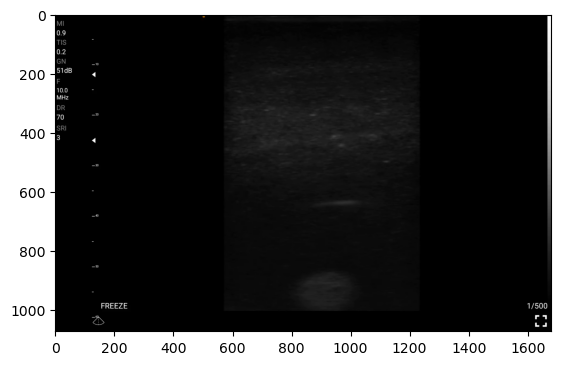

In [16]:
import matplotlib.pyplot as plt

plt.imshow(images[0])

In [17]:
images = pd.Series(images, name="image")

In [18]:
reassembled_df = pd.concat([timestamps, images, ot_columns], axis=1)

In [19]:
reassembled_df

,timestamp,image,qw,qx,qy,qz,x,y,z
0,1722338113379870000,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0.279206,0.115844,-0.85473,0.421972,121.207672,-15.188503,-911.94397
1,1722338113479870000,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0.279206,0.115844,-0.85473,0.421972,121.207672,-15.188503,-911.94397
2,1722338113579870000,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0.279206,0.115844,-0.85473,0.421972,121.207672,-15.188503,-911.94397
3,1722338113679870000,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0.279206,0.115844,-0.85473,0.421972,121.207672,-15.188503,-911.94397
4,1722338113779870000,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0.279206,0.115844,-0.85473,0.421972,121.207672,-15.188503,-911.94397
...,...,...,...,...,...,...,...,...,...
495,1722338162879870000,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0.491466,0.288689,-0.66731,0.479392,29.794506,-17.886936,-717.46405
496,1722338162979870000,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0.491466,0.288689,-0.66731,0.479392,29.794506,-17.886936,-717.46405
497,1722338163079870000,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0.491466,0.288689,-0.66731,0.479392,29.794506,-17.886936,-717.46405
498,1722338163179870000,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0.491466,0.288689,-0.66731,0.479392,29.794506,-17.886936,-717.46405


## Compare with expected data format


In [20]:
SAMPLE_DATA_DIR = f"{DATA_DIR}/Demo/"

sample_frame_data = np.load(f"{SAMPLE_DATA_DIR}/Demo_frames.npy", allow_pickle=True)

In [21]:
sample_frame_data

array([[[  0,   2,   0, ...,   4,   3,   5],
        [  2,   4,   3, ...,   3,   3,   2],
        [  1,   1,   2, ...,   2,   3,   0],
        ...,
        [115, 106,  99, ...,  16,  21,  37],
        [121, 109, 100, ...,  15,  20,  35],
        [124, 110, 100, ...,  14,  21,  33]],

       [[  0,   0,   3, ...,   0,   2,   0],
        [  6,  11,  12, ...,   0,   3,   0],
        [ 20,  24,  22, ...,   1,   3,   3],
        ...,
        [108, 107,  98, ...,  21,  28,  35],
        [111, 111,  97, ...,  19,  26,  34],
        [112, 114,  97, ...,  18,  26,  33]],

       [[ 28,  26,  21, ...,   8,   2,   8],
        [ 44,  44,  41, ...,  10,   4,  12],
        [ 61,  68,  65, ...,  14,   6,  18],
        ...,
        [107, 103,  97, ...,  25,  31,  28],
        [107, 105,  95, ...,  22,  28,  28],
        [107, 107,  94, ...,  20,  25,  28]],

       ...,

       [[113, 112,  92, ...,  90, 101, 114],
        [115, 104,  94, ...,  92,  99, 111],
        [109, 107,  87, ..., 108, 121, 127

In [22]:
sample_frame_data.shape

(224, 224, 109)

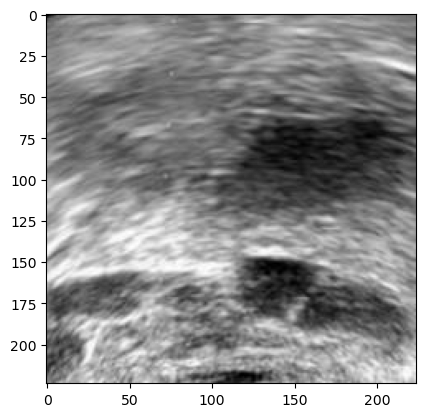

In [23]:
plt.imshow(sample_frame_data[:, :, 0], "gray")

In [24]:
sample_tracker_data_path = f"{SAMPLE_DATA_DIR}/Demo_pos.txt"

In [25]:
with open(sample_tracker_data_path, "r") as f:
    sample_tracker_data = f.readlines()

In [26]:
sample_tracker_data

['0.000000000000000000e+00 0.000000000000000000e+00 -1.292333221435546875e+01 -3.338758945465087891e+00 -2.384174041748046875e+02 1.275739967823028564e-01 3.953250050544738770e-01 -1.989009976387023926e-01 8.876270055770874023e-01\n',
 '0.000000000000000000e+00 0.000000000000000000e+00 -1.228389072418212891e+01 -3.080163002014160156e+00 -2.386573791503906250e+02 1.275780051946640015e-01 3.950810134410858154e-01 -2.017090022563934326e-01 8.871009945869445801e-01\n',
 '0.000000000000000000e+00 0.000000000000000000e+00 -1.205417919158935547e+01 -2.891021013259887695e+00 -2.387073974609375000e+02 1.275759935379028320e-01 3.950330018997192383e-01 -2.034029960632324219e-01 8.867359757423400879e-01\n',
 '0.000000000000000000e+00 0.000000000000000000e+00 -1.185477542877197266e+01 -2.442420005798339844e+00 -2.387072753906250000e+02 1.278810054063796997e-01 3.945980072021484375e-01 -2.061119973659515381e-01 8.862599730491638184e-01\n',
 '0.000000000000000000e+00 0.000000000000000000e+00 -1.17350

In [27]:
sample_tracker_data = [line.split(" ") for line in sample_tracker_data]

In [28]:
sample_tracker_data[0]

['0.000000000000000000e+00',
 '0.000000000000000000e+00',
 '-1.292333221435546875e+01',
 '-3.338758945465087891e+00',
 '-2.384174041748046875e+02',
 '1.275739967823028564e-01',
 '3.953250050544738770e-01',
 '-1.989009976387023926e-01',
 '8.876270055770874023e-01\n']

In [29]:
sample_tracker_data = np.loadtxt(sample_tracker_data_path)

In [30]:
sample_tracker_data.astype(np.float32)

array([[ 0.0000000e+00,  0.0000000e+00, -1.2923332e+01, -3.3387589e+00,
        -2.3841740e+02,  1.2757400e-01,  3.9532501e-01, -1.9890100e-01,
         8.8762701e-01],
       [ 0.0000000e+00,  0.0000000e+00, -1.2283891e+01, -3.0801630e+00,
        -2.3865738e+02,  1.2757801e-01,  3.9508101e-01, -2.0170900e-01,
         8.8710099e-01],
       [ 0.0000000e+00,  0.0000000e+00, -1.2054179e+01, -2.8910210e+00,
        -2.3870740e+02,  1.2757599e-01,  3.9503300e-01, -2.0340300e-01,
         8.8673598e-01],
       [ 0.0000000e+00,  0.0000000e+00, -1.1854775e+01, -2.4424200e+00,
        -2.3870728e+02,  1.2788101e-01,  3.9459801e-01, -2.0611200e-01,
         8.8625997e-01],
       [ 0.0000000e+00,  0.0000000e+00, -1.1735039e+01, -2.1832480e+00,
        -2.3877722e+02,  1.2827501e-01,  3.9434499e-01, -2.0759800e-01,
         8.8596898e-01],
       [ 0.0000000e+00,  0.0000000e+00, -1.1515752e+01, -1.7549241e+00,
        -2.3885718e+02,  1.2728401e-01,  3.9420399e-01, -2.1131800e-01,
         8.

In [31]:
sample_df = pd.DataFrame(
    sample_tracker_data,
    columns=["ignore1", "ignore2", "x", "y", "z", "qw", "qx", "qy", "qz"],
)

In [32]:
sample_df

,ignore1,ignore2,x,y,z,qw,qx,qy,qz
0,0.0,0.0,-12.923332,-3.338759,-238.417404,0.127574,0.395325,-0.198901,0.887627
1,0.0,0.0,-12.283891,-3.080163,-238.657379,0.127578,0.395081,-0.201709,0.887101
2,0.0,0.0,-12.054179,-2.891021,-238.707397,0.127576,0.395033,-0.203403,0.886736
3,0.0,0.0,-11.854775,-2.442420,-238.707275,0.127881,0.394598,-0.206112,0.886260
4,0.0,0.0,-11.735039,-2.183248,-238.777222,0.128275,0.394345,-0.207598,0.885969
...,...,...,...,...,...,...,...,...,...
104,0.0,0.0,72.114578,68.107941,-225.088486,0.326859,0.303506,-0.658662,0.605980
105,0.0,0.0,72.652908,68.307968,-224.848907,0.328414,0.302838,-0.660260,0.603730
106,0.0,0.0,73.022102,68.418076,-224.729187,0.329610,0.302323,-0.660798,0.602748
107,0.0,0.0,73.201668,68.758148,-224.579727,0.330100,0.303001,-0.661107,0.601799


In [33]:
# reorder sample_frames from HWC to CHW
sample_frame_data = np.moveaxis(sample_frame_data, -1, 0)

## Convert our data to their format


In [34]:
frames = reassembled_df["image"].values
x = reassembled_df["x"]
y = reassembled_df["y"]
z = reassembled_df["z"]
qx = reassembled_df["qx"]
qy = reassembled_df["qy"]
qz = reassembled_df["qz"]
qw = reassembled_df["qw"]

In [35]:
frames = np.array(frames.tolist()).astype(np.uint8)

In [36]:
frames.shape

(500, 1072, 1680, 3)

In [37]:
# find brightest frame by summing pixel values in array with dims (n_frames, height, width, channels)
brightest_frame = np.argmax(frames.sum(axis=(1, 2, 3)))

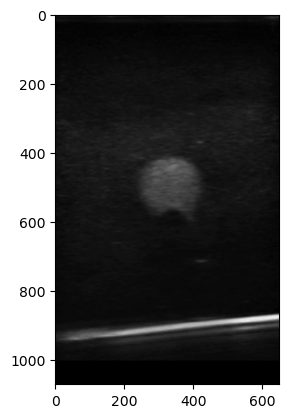

In [38]:
plt.imshow((frames[brightest_frame][:, 580:1230, :]))

In [39]:
frames = np.squeeze(frames[:, :, 580:1230, 0])

In [40]:
frames[brightest_frame].shape

(1072, 650)

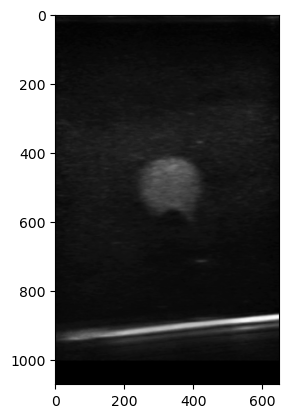

In [41]:
plt.imshow(frames[brightest_frame], "gray")

In [42]:
pos_array = np.array([np.zeros([500]), np.zeros([500]), x, y, z, qx, qy, qz, qw])

In [43]:
pos_array.shape

(9, 500)

In [44]:
pos_array = pos_array.T

In [45]:
pos_array.shape

(500, 9)

In [46]:
np.savetxt(
    f"data/phantom/phantom_pos.txt",
    pos_array,
)

In [47]:
# preserving aspect ratio, resize smaller dimension to 224 pixels
from scipy.ndimage import zoom

zoom_factor = 224 / min(frames.shape[1:])
zoom_factors = [1, zoom_factor, zoom_factor]

frames = zoom(frames, zoom_factors, order=1)

In [48]:
(
    c,
    h,
    w,
) = frames.shape

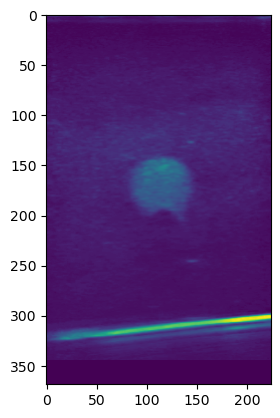

In [49]:
plt.imshow(frames[brightest_frame])

In [50]:
frames = frames[:, :w, :]

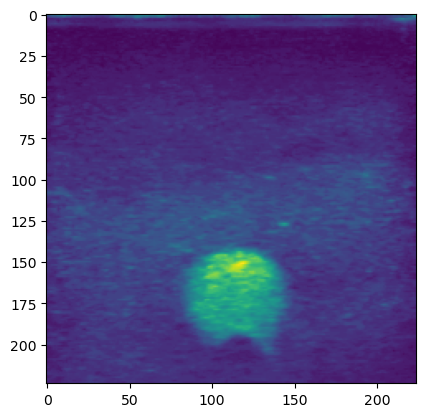

In [51]:
plt.imshow(frames[brightest_frame])

In [52]:
frames.shape

(500, 224, 224)

In [53]:
# move first dimension to last

frames = np.moveaxis(frames, 0, -1)

In [54]:
# generate placeholder calibration matrix 4x4
calibration_matrix = np.eye(4)
np.savetxt(f"data/phantom/phantom_USCalib.txt", calibration_matrix)
np.save(f"data/phantom/phantom_frames.npy", frames)

In [55]:
sample_tracker_data.shape

(109, 9)